In [2]:
# https://signate.jp/competitions/750/data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample_submission.csv",header=None)


In [6]:
# trainデータの先頭行を表示
train.head()
# print(train.head())

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,364,1917,1970,16,7,6,1,1,1,0


In [7]:
train

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1203,0,0.680981,1,1,1,23,0.402580,117,...,1331,721,1970,15,1,4,1,0,1,2
1,3,1203,1,2.602754,1,0,0,8,0.415612,194,...,1571,1262,1150,14,16,14,1,0,1,3
2,4,1980,1,2.604065,1,0,0,6,0.858110,122,...,364,721,1970,18,12,11,1,0,1,1
3,5,1185,1,2.669403,1,3,0,33,0.027065,132,...,447,1162,1950,15,3,19,1,0,0,2
4,7,1203,1,2.375453,0,4,1,12,0.141485,135,...,364,1917,1970,16,7,6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1994,710,0,1.827054,0,0,1,61,0.139117,199,...,788,1023,3269,12,4,2,1,1,1,1
1196,1995,965,1,0.498963,0,6,0,32,0.923505,103,...,813,721,1970,18,5,20,1,0,0,3
1197,1996,1949,0,0.470755,0,1,0,38,0.798602,134,...,115,1951,1598,18,3,17,0,0,0,1
1198,1997,1537,0,1.323370,0,1,1,4,0.122960,187,...,376,1692,3952,14,2,9,1,1,0,1


In [5]:
# testデータの先頭行を表示
print(test.head())

   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1203     0     0.498993         1   0       1          40   
1   2           1154     0     1.981014         0   1       0          33   
2   6           1027     1     1.647026         0   0       1          32   
3  10            833     0     1.070061         0   0       0           2   
4  12           1027     1     1.859165         0   4       1           2   

      m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0  0.914530        190  ...   7        381       721  1970     6     1   
1  0.025999         82  ...  10        376      1555  1970    11     7   
2  0.912318        103  ...   1        364      1374  1970    17     1   
3  0.033010        156  ...   0       1331      1710   832    12     8   
4  0.612349        171  ...  13        667      1642  2655    14     5   

   talk_time  three_g  touch_screen  wifi  
0          2        1             0     1  
1   

In [3]:
# trainデータの統計的な情報を表示
print(train.describe())

                id  battery_power         blue  clock_speed     dual_sim  \
count  1200.000000    1200.000000  1200.000000  1200.000000  1200.000000   
mean   1014.411667    1208.958333     0.408333     1.231201     0.565833   
std     577.846419     421.707099     0.491730     0.786728     0.495854   
min       0.000000     518.000000     0.000000     0.466459     0.000000   
25%     517.750000     916.000000     0.000000     0.498935     0.000000   
50%    1030.500000    1203.000000     0.000000     1.086733     1.000000   
75%    1504.250000    1537.000000     1.000000     1.864943     1.000000   
max    1999.000000    1991.000000     1.000000     2.730560     1.000000   

                fc       four_g   int_memory        m_dep    mobile_wt  ...  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  ...   
mean      1.452500     0.625833    29.747500     0.374023   137.475833  ...   
std       2.590045     0.484109    17.514071     0.322579    34.706169  ...   

In [12]:
# testデータの統計的な情報を表示
print(test.describe())

               id  battery_power        blue  clock_speed    dual_sim  \
count   800.00000     800.000000  800.000000   800.000000  800.000000   
mean    977.13250    1188.763750    0.403750     1.223439    0.528750   
std     576.60431     407.677187    0.490955     0.744962    0.499485   
min       1.00000     518.000000    0.000000     0.473651    0.000000   
25%     476.25000     832.000000    0.000000     0.498971    0.000000   
50%     955.50000    1203.000000    0.000000     1.116135    1.000000   
75%    1491.50000    1537.000000    1.000000     1.835573    1.000000   
max    1998.00000    1991.000000    1.000000     2.689474    1.000000   

               fc      four_g  int_memory       m_dep   mobile_wt  ...  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  ...   
mean     1.521250    0.602500   29.818750    0.342255  138.188750  ...   
std      2.576887    0.489687   16.443049    0.313245   36.701797  ...   
min      0.000000    0.000000    2.000000    0

In [ ]:
# 目的変数（price_range）の分布を可視化
plt.hist(train['price_range'])
plt.xlabel('price_range')
plt.ylabel('Count')
plt.title('Distribution of price_range')
plt.show()

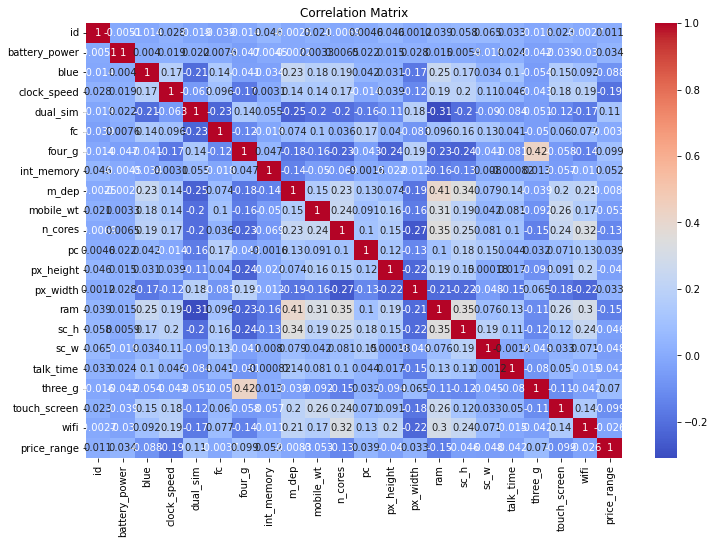

In [16]:
# 数値列の相関行列を計算
correlation_matrix = train.corr()

# 相関行列のヒートマップを可視化
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
'''
以下の特徴量がprice_rangeと相関があることが示されています:
    clock_speed: 負の相関があります。
    dual_sim: 正の相関があります。
    four_g: 正の相関があります。
    n_cores: 負の相関があります。
    ram: 負の相関があります。
    three_g: 正の相関があります。
    touch_screen: 負の相関があります。
'''
correlation_with_price_range = train.corr()['price_range'].drop('price_range')
print(correlation_with_price_range)

id               0.010506
battery_power    0.034393
blue            -0.087965
clock_speed     -0.191862
dual_sim         0.114032
fc              -0.003688
four_g           0.098793
int_memory       0.051820
m_dep           -0.008338
mobile_wt       -0.053276
n_cores         -0.126218
pc               0.039364
px_height       -0.039832
px_width         0.033333
ram             -0.153472
sc_h            -0.045995
sc_w            -0.047693
talk_time       -0.042415
three_g          0.070085
touch_screen    -0.099301
wifi            -0.025522
Name: price_range, dtype: float64


In [53]:
# 一回目 
from sklearn.metrics import f1_score

# 訓練データでの学習と予測
# ここでは仮にロジスティック回帰を使用する例とします
from sklearn.linear_model import LogisticRegression

# 特徴量と目的変数を設定
X_train = train.drop('price_range', axis=1)
y_train = train['price_range']

# モデルの学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 評価データでの予測
X_test = test  # テストデータの特徴量（price_range列を含まない）
y_test_pred = model.predict(X_test)  # テストデータの予測結果

# F1スコアを計算
f1_macro = f1_score(y_train[:800], y_test_pred, average='macro')
# 結果を表示
print("F1 Macro: ", f1_macro)

# 結果をCSVファイルとして保存
sample[1] = y_test_pred
sample.to_csv("submission1.csv",index=None,header=None)

F1 Macro:  0.21872054389699097


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#3回目　提出
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
sample = pd.read_csv("./sample_submission.csv",header=None)

# データの読み込みと前処理
data = pd.read_csv('train.csv')  # データの読み込み（適切なファイル名に変更してください）
features = data[['clock_speed', 'ram']]  # 特徴量の選択
target = data['price_range']  # 目的変数の指定

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.666, random_state=42)

# ランダムフォレストモデルの訓練と予測
model = RandomForestClassifier()  # モデルのインスタンス化
model.fit(X_train, y_train)  # モデルの訓練
predictions = model.predict(X_test)  # テストデータの予測

# モデルの評価
print(classification_report(y_test, predictions))
predictions

# 結果をCSVファイルとして保存
sample[1] = predictions
sample.to_csv("submission.csv",index=None,header=None)

In [3]:
# ４回目
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読み込み
data = pd.read_csv('./train.csv')  # データの読み込み（適切なファイル名に変更してください）

# 特徴量と目的変数の選択
features = data.drop('price_range', axis=1)  # 目的変数を除いた特徴量の選択
target = data['price_range']  # 目的変数の選択

# 訓練データとテストデータの分割
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.666, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# データの前処理や特徴量の選択などが済んでいるとします
# X_train, X_test, y_train, y_test は訓練データとテストデータに分割済みの特徴量と目的変数です

# ロジスティック回帰モデルの訓練
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# ランダムフォレストモデルの訓練
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# サポートベクターマシンモデルの訓練
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# 各モデルの予測精度を比較
print("ロジスティック回帰の予測精度:", logreg_accuracy)
print("ランダムフォレストの予測精度:", rf_accuracy)
print("サポートベクターマシンの予測精度:", svm_accuracy)

# アンサンブル学習のコード例を
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# データの前処理や特徴量の選択などが済んでいるとします
# X_train, X_test, y_train, y_test は訓練データとテストデータに分割済みの特徴量と目的変数です

# 各分類器を定義
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# アンサンブル学習モデルの定義
ensemble_model = VotingClassifier(estimators=[('lr', logreg), ('rf', rf), ('svm', svm)], voting='hard')

# アンサンブル学習モデルの訓練
ensemble_model.fit(X_train, y_train)

# アンサンブル学習モデルの予測
ensemble_predictions = ensemble_model.predict(X_test)

# アンサンブル学習モデルの予測精度
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("アンサンブル学習モデルの予測精度:", ensemble_accuracy)


from sklearn.metrics import f1_score

# モデルの予測結果
predictions = ensemble_model.predict(X_test)

# F1スコアの計算
f1_macro = f1_score(y_test, predictions, average='macro')

print("F1スコア（マクロ平均）:", f1_macro)


# csv出力
sample = pd.read_csv("./sample_submission.csv",header=None)
sample[1] = predictions
sample.to_csv("submission.csv",index=None,header=None)



c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ロジスティック回帰の予測精度: 0.42375
ランダムフォレストの予測精度: 0.475
サポートベクターマシンの予測精度: 0.4425


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


アンサンブル学習モデルの予測精度: 0.455
F1スコア（マクロ平均）: 0.43158476121138406


In [6]:
# 5回目
from sklearn.metrics import f1_score

# 訓練データでの学習と予測
# ここでは仮にロジスティック回帰を使用する例とします
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 特徴量と目的変数を設定
X_train = train.drop('price_range', axis=1)
y_train = train['price_range']

# ロジスティック回帰モデルの訓練
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# ランダムフォレストモデルの訓練
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# サポートベクターマシンモデルの訓練
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# 各モデルの予測精度を比較
print("ロジスティック回帰の予測精度:", logreg_accuracy)
print("ランダムフォレストの予測精度:", rf_accuracy)
print("サポートベクターマシンの予測精度:", svm_accuracy)

# F1スコアの計算
f1_macro1 = f1_score(y_test, logreg_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro1)
f1_macro2 = f1_score(y_test, rf_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro2)
f1_macro3 = f1_score(y_test, svm_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro3)

# csv出力
sample = pd.read_csv("./sample_submission.csv",header=None)
sample[1] = rf_predictions
sample.to_csv("submission.csv",index=None,header=None)


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ロジスティック回帰の予測精度: 0.4625
ランダムフォレストの予測精度: 1.0
サポートベクターマシンの予測精度: 0.46875
F1スコア（マクロ平均）: 0.35493553382243714
F1スコア（マクロ平均）: 1.0
F1スコア（マクロ平均）: 0.3749197137653075


In [16]:
# 6回目
from sklearn.metrics import f1_score

# 訓練データでの学習と予測
# ここでは仮にロジスティック回帰を使用する例とします
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# 特徴量と目的変数の選択
X_train = train.drop('price_range', axis=1)  # 目的変数を除いた特徴量の選択
y_train = train['price_range']  # 目的変数の選択

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.666, random_state=42)

# ロジスティック回帰モデルの定義
logreg = LogisticRegression()
# 特徴量を設定
X_train_selected = X_train[['clock_speed', 'ram']]
X_test_selected = X_test[['clock_speed', 'ram']]
# ロジスティック回帰モデルの訓練
logreg.fit(X_train_selected, y_train)
# ロジスティック回帰モデルの予測
logreg_predictions = logreg.predict(X_test_selected)

# ランダムフォレストモデルの定義
rf = RandomForestClassifier()
# 特徴量を設定
X_train_selected = X_train[['clock_speed', 'ram']]
X_test_selected = X_test[['clock_speed', 'ram']]
# ランダムフォレストモデルの訓練
rf.fit(X_train_selected, y_train)
# ランダムフォレストモデルの予測
rf_predictions = rf.predict(X_test_selected)

# サポートベクターマシンモデルの定義
svm = SVC()
# 特徴量を設定
X_train_selected = X_train[['clock_speed', 'ram']]
X_test_selected = X_test[['clock_speed', 'ram']]
# サポートベクターマシンモデルの訓練
svm.fit(X_train_selected, y_train)
# サポートベクターマシンモデルの予測
svm_predictions = svm.predict(X_test_selected)

# F1スコアの計算
f1_macro1 = f1_score(y_test, logreg_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro1)
f1_macro2 = f1_score(y_test, rf_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro2)
f1_macro3 = f1_score(y_test, svm_predictions, average='macro')
print("F1スコア（マクロ平均）:", f1_macro3)

# csv出力(6回目)
# sample = pd.read_csv("./sample_submission.csv",header=None)
# sample[1] = rf_predictions
# sample.to_csv("submission.csv",index=None,header=None)

# csv出力(7回目)
# sample = pd.read_csv("./sample_submission.csv",header=None)
# sample[1] = svm_predictions
# sample.to_csv("submission.csv",index=None,header=None)

# csv出力(8回目)
sample = pd.read_csv("./sample_submission.csv",header=None)
sample[1] = logreg_predictions
sample.to_csv("submission.csv",index=None,header=None)


F1スコア（マクロ平均）: 0.347102880242326
F1スコア（マクロ平均）: 0.40006427200891526
F1スコア（マクロ平均）: 0.37028897080686096


In [29]:
# 9回目
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読み込み
data = pd.read_csv('./train.csv')  # データの読み込み（適切なファイル名に変更してください）

# 特徴量と目的変数の選択
features = data.drop('price_range', axis=1)  # 目的変数を除いた特徴量の選択
target = data['price_range']  # 目的変数の選択

# 訓練データとテストデータの分割
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.666, random_state=42)

# アンサンブル学習のコード例を
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# データの前処理や特徴量の選択などが済んでいるとします
# X_train, X_test, y_train, y_test は訓練データとテストデータに分割済みの特徴量と目的変数です

# 各分類器を定義
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# アンサンブル学習モデルの定義
ensemble_model = VotingClassifier(estimators=[('lr', logreg), ('svm', svm)], voting='hard')

# アンサンブル学習モデルの訓練
ensemble_model.fit(X_train, y_train)

# アンサンブル学習モデルの予測
ensemble_predictions = ensemble_model.predict(X_test)

# アンサンブル学習モデルの予測精度
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("アンサンブル学習モデルの予測精度:", ensemble_accuracy)


from sklearn.metrics import f1_score

# モデルの予測結果
predictions = ensemble_model.predict(X_test)

# F1スコアの計算
f1_macro = f1_score(y_test, predictions, average='macro')

print("F1スコア（マクロ平均）:", f1_macro)

# csv出力
sample = pd.read_csv("./sample_submission.csv",header=None)
sample[1] = predictions
sample.to_csv("submission.csv",index=None,header=None)



アンサンブル学習モデルの予測精度: 0.4325
F1スコア（マクロ平均）: 0.37633006127929236


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# 10回目
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読み込み
data = pd.read_csv('./train.csv')  # データの読み込み（適切なファイル名に変更してください）

# 特徴量と目的変数の選択
features = data.drop('price_range', axis=1)  # 目的変数を除いた特徴量の選択
target = data['price_range']  # 目的変数の選択

# 訓練データとテストデータの分割
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.333, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

# アンサンブル学習のコード例を
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 各分類器を定義
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# アンサンブル学習モデルの定義
ensemble_model = VotingClassifier(estimators=[('lr', logreg), ('svm', svm)], voting='hard')

# アンサンブル学習モデルの訓練
ensemble_model.fit(X_train, y_train)

# アンサンブル学習モデルの予測
ensemble_predictions = ensemble_model.predict(X_train)

# アンサンブル学習モデルの予測精度
ensemble_accuracy = accuracy_score(y_train, ensemble_predictions)

print("アンサンブル学習モデルの予測精度:", ensemble_accuracy)

from sklearn.metrics import f1_score

# モデルの予測結果
predictions = ensemble_model.predict(X_train)

# F1スコアの計算
f1_macro = f1_score(y_train, predictions, average='macro')

print("F1スコア（マクロ平均）:", f1_macro)

# csv出力
sample = pd.read_csv("./sample_submission.csv",header=None)
sample[1] = predictions
sample.to_csv("submission.csv",index=None,header=None)



800
400
800
400


c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


アンサンブル学習モデルの予測精度: 0.415
F1スコア（マクロ平均）: 0.2961522183517749


In [37]:
# 11回目
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# データの読み込み
data = pd.read_csv('./train.csv')  # データの読み込み（適切なファイル名に変更してください）

# 特徴量と目的変数の選択
features = data[['clock_speed', 'ram']]
target = data['price_range']

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# 各分類器を定義
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

# アンサンブル学習モデルの定義
ensemble_model = VotingClassifier(estimators=[('lr', logreg), ('rf', rf), ('svm', svm)], voting='hard')

# アンサンブル学習モデルの訓練
ensemble_model.fit(X_train, y_train)

# アンサンブル学習モデルの予測
ensemble_predictions = ensemble_model.predict(X_test)
print(ensemble_predictions)

# アンサンブル学習モデルの予測精度
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("アンサンブル学習モデルの予測精度:", ensemble_accuracy)

# F1スコアの計算
f1_macro = f1_score(y_test, ensemble_predictions, average='macro')

print("F1スコア（マクロ平均）:", f1_macro)

# csv出力
submission = pd.DataFrame({range(1, len(X_test) + 1), ensemble_predictions})
# submission = pd.DataFrame({'id': range(1, len(X_test) + 1), 'price_range': ensemble_predictions})
submission.to_csv("submission.csv", index=False, header=False)

[2 2 1 0 1 2 2 2 0 1 2 1 1 1 1 1 2 0 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 0 0 1 1
 1 2 2 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 2 2 2 2 1 1 2 1 2 2 2 0 2 1 1 2
 1 1 1 1 1 1 0 1 2 0 1 1 2 2 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 0 2 0 1 1 0 2 1 1 1 1 2 1 0 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 0 1 0 1 2
 1 1 1 1 0 1 1 2 1 0 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 2
 0 1 1 1 2 0 1 1 1 2 2 2 1 1 1 1 1 1 2 1 2 0 1 1 0 1 2 1 2 1 2 1 2 0 0 1 1
 0 1 2 2 2 1 2 2 1 1 1 2 1 1 2 1 0 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 0 1 0 1 2
 2 2 2 2 1 0 2 2 0 1 1 0 1 2 2 1 1 0 1 1 1 1 2 1 2 1 1 0 1 1 0 1 0 2 2 0 1
 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 0 1 2 2 2 0 2 1 1 1]
アンサンブル学習モデルの予測精度: 0.43333333333333335
F1スコア（マクロ平均）: 0.3350680285841172


TypeError: unhashable type: 'numpy.ndarray'

In [54]:
# 12回目
# データの読み込み
data = pd.read_csv('./train.csv')  # データの読み込み（適切なファイル名に変更してください）

from sklearn.linear_model import LogisticRegression
import pandas as pd

# データの読み込み
data = pd.read_csv('train.csv')  # データの読み込み（適切なファイル名に変更してください）

# 特徴量と目的変数の選択
X = data.drop('price_range', axis=1)  # 特徴量の選択
y = data['price_range']  # 目的変数の選択

# ロジスティック回帰モデルの定義と訓練
logreg = LogisticRegression()
logreg.fit(X, y)

# 新しいデータの予測確率を出力
new_data = pd.read_csv('test.csv')  # 予測を行う新しいデータの読み込み（適切なファイル名に変更してください）
probabilities = logreg.predict(new_data)

# 結果の表示
print(probabilities)

# csv出力
sample = pd.read_csv("./sample_submission.csv",header=None)
print(sample)
sample[1] = probabilities
sample.to_csv("submission.csv",index=None,header=None)

[3 2 2 1 1 3 2 2 1 2 2 2 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 1 2 1
 2 2 1 1 2 1 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1 1 2 2 2 1 1 2 2 2 2 2 3 1 2 2 2
 2 1 1 1 2 1 2 2 1 2 2 1 2 1 1 2 3 3 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 3 2 1 2
 1 2 1 1 2 1 1 1 2 2 3 1 2 1 1 2 2 1 1 1 2 1 2 0 1 2 2 1 3 2 2 1 1 2 1 1 1
 2 2 2 1 2 2 1 1 2 2 1 1 2 1 1 2 2 2 1 1 1 2 2 1 2 3 2 2 2 1 2 3 1 2 2 1 2
 2 1 1 1 2 1 1 2 1 2 2 2 1 1 1 3 2 2 2 2 1 2 1 1 1 1 3 3 1 1 2 2 2 1 1 2 1
 1 1 2 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 1 2 0 2 1
 2 3 2 2 2 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 3 2 1 2 3 1 1 1
 2 2 2 1 1 1 1 3 1 2 1 1 1 3 2 1 1 2 2 1 2 2 1 2 2 1 2 2 1 2 1 1 1 2 1 1 3
 1 1 1 2 2 2 2 3 1 1 3 2 3 1 1 1 3 2 2 3 2 1 3 2 1 2 1 1 3 1 1 1 1 2 2 1 3
 1 3 1 2 3 2 2 1 1 1 2 2 2 1 1 2 1 2 3 2 2 1 2 2 2 3 1 2 1 2 2 3 2 2 2 3 3
 2 1 2 3 1 2 1 2 1 1 2 1 2 2 2 2 1 2 2 1 1 1 2 1 1 2 1 2 3 3 2 1 2 2 2 1 2
 1 1 1 2 1 2 1 1 2 2 1 3 2 1 2 1 2 1 2 2 1 2 2 2 3 2 1 2 1 2 3 1 2 2 2 3 3
 2 2 2 2 3 1 3 3 1 2 0 2 

c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
